In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
plt.rcParams['font.family']= ['Microsoft JhengHei']

In [5]:
df1 = pd.read_excel("C:\\Users\\88698\\南山\\raw_data\\CLAIM_ACCT_FIN_1.xlsx")
df2 = pd.read_excel("C:\\Users\\88698\\南山\\raw_data\\CLAIM_ACCT_FIN_2.xlsx")

In [6]:
df2.index = [120000+i for i in range(len(df2))]
frames = [df1,df2]
df = pd.concat(frames)

In [7]:
df.tail()

,INJURED_RK,Claim_RK,Policy_RK,BundleSubtype2,illness_code,illness_desc,DiagnosisCode_DESC,claim_settle_dt,REIMBURSED_YR_TW,INSURED_RK,POLICY_HOLDER_RK,MATURITY_BENEFICIARY_RK,DEATH_BENEFICIARY_RK
234423,249733,30121,166605,6.N意外醫療,Y99.8,其他外因狀態,99.不知道不想猜,2015-07-09,33600.0,249733,250207,NaN,250207.0
234424,249733,86463,166605,5.N疾病醫療,D33,大腦及中樞神經系統其他部位之良性腫瘤,02.腫瘤,2016-11-02,231.0,249733,250207,NaN,250207.0
234425,249733,109718,166605,6.N意外醫療,Z04.2,來院接受對工作意外後之檢查及觀察,21.影響健康狀態與保健機構接觸的,2017-02-11,1163.4,249733,250207,NaN,250207.0
234426,249733,204841,166605,6.N意外醫療,V23,摩拖車騎士與汽車，小貨車或箱型車碰撞受傷,20.疾病和死亡的外因,2017-10-29,12478.2,249733,250207,NaN,250207.0
234427,249795,189792,97319,5.N疾病醫療,K05,齒齦炎及牙周疾病,11.消化系統疾病,2017-09-20,3307.5,249795,249795,249795.0,NaN


# Missing Value

In [8]:
df.isnull().sum(axis = 0)

INJURED_RK                      0
Claim_RK                        0
Policy_RK                       0
BundleSubtype2                  0
illness_code                    0
illness_desc                    0
DiagnosisCode_DESC              0
claim_settle_dt                 0
REIMBURSED_YR_TW                0
INSURED_RK                      0
POLICY_HOLDER_RK                0
MATURITY_BENEFICIARY_RK    162475
DEATH_BENEFICIARY_RK       175195
dtype: int64

# 1 事故人RK

In [9]:
df['INJURED_RK'].value_counts(dropna=False).sort_index()

14        4
24        1
89        4
129       1
151       2
         ..
249645    1
249666    1
249694    1
249733    4
249795    1
Name: INJURED_RK, Length: 100130, dtype: int64

# 2 保單號碼

In [10]:
df['Policy_RK'].value_counts(dropna=False)

10071     63
139934    59
65919     57
57094     55
153570    55
          ..
105722     1
103675     1
109820     1
113918     1
4098       1
Name: Policy_RK, Length: 113656, dtype: int64

# 3 理賠案件型態

In [11]:
subtype = df['BundleSubtype2'].value_counts(dropna=False).sort_index()
subtype

1.D身故給付      3841
2.T完全失能       224
3.P部份失能       160
4.C重大疾病      6483
5.N疾病醫療    132549
6.N意外醫療     91171
Name: BundleSubtype2, dtype: int64

<BarContainer object of 6 artists>

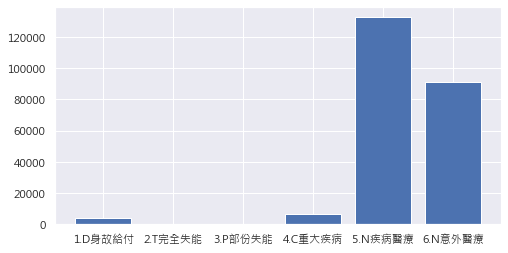

In [12]:
sns.set()
plt.rcParams['font.family']= ['Microsoft JhengHei']
plt.figure(figsize=(8,4))
plt.bar(subtype.index, subtype.values)

# 4 疾病

In [11]:
df['illness_code'].value_counts(dropna=False)

W18      26959
Y99.8    22910
V23      15598
C50       9080
Y93.7     8174
         ...  
S92.0        1
S71          1
H43          1
Q39.1        1
I51.7        1
Name: illness_code, Length: 402, dtype: int64

In [12]:
tmp = df['illness_desc'].value_counts(dropna=False)
tmp

其他滑倒、摔倒或絆倒和跌落           26959
其他外因狀態                  22910
摩拖車騎士與汽車，小貨車或箱型車碰撞受傷    15598
乳房惡性腫瘤                   9080
涉及其他特定運動和競技之活動           8174
                        ...  
腦下腺功能亢進                     1
肩膀及上臂開放性傷口                  1
玻璃體疾患                       1
腓骨幹骨折                       1
其他及未明示梅毒                    1
Name: illness_desc, Length: 406, dtype: int64

In [13]:
sum([ 1 for i in tmp if i >= 100])

182

In [14]:
# 太多類，要如何放入模型中 ?

# 事故人 被保人 要保人重疊情形

In [15]:
# 事故人=被保人=要保人 數量
df[(df['INSURED_RK']==df['POLICY_HOLDER_RK']) & (df['INJURED_RK']==df['POLICY_HOLDER_RK'])]['Policy_RK'].count()

167860

In [16]:
# 被保人=要保人
df[(df['INSURED_RK']==df['POLICY_HOLDER_RK'])]['Policy_RK'].count()

172115

In [17]:
# 事故人=要保人
df[(df['INJURED_RK']==df['POLICY_HOLDER_RK'])]['Policy_RK'].count()

168112

In [18]:
# 事故人=被保人
df[(df['INJURED_RK']==df['INSURED_RK'])]['Policy_RK'].count()

229636

# 時間

In [2]:
df['claim_settle_dt'].max()

NameError: name 'df' is not defined

In [1]:
df['claim_settle_dt'].min()

NameError: name 'df' is not defined